In [2]:
import pandas as pd
import numpy as np
import hypertools as hyp
import seaborn as sns
from timeit import default_timer as timer
import os
import altair as alt
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [3]:
init = pd.read_csv('/home/msouza/Documentos/data/parsed/VHR02e_S12_L001_R1_001aafreq.csv')
final = pd.read_csv('/home/msouza/Documentos/data/parsed/VHR42g_S13_L001_R1_001aafreq.csv')

In [18]:
for e in init.columns:
    print(e, end=', ')

cdr3, quantity, length, MW, AV, IP, flex, gravy, SSF_Helix, SSF_Turn, SSF_Sheet, n_A, n_C, n_D, n_E, n_F, n_G, n_H, n_I, n_K, n_L, n_M, n_N, n_P, n_Q, n_R, n_S, n_T, n_V, n_W, n_Y, aliphatic, aromatic, neutral, positive, negative, invalid, 

In [4]:
init.head()

,cdr3,quantity,length,MW,AV,IP,flex,gravy,SSF_Helix,SSF_Turn,...,n_T,n_V,n_W,n_Y,aliphatic,aromatic,neutral,positive,negative,invalid
0,FIVESK,5443,6,721.8413,0.1667,6.0014,0.7368,0.5500,0.5000,0.1667,...,0,1,0,0,2,1,1,1,1,0
1,DGVAVAGLDY,2463,10,979.0413,0.1000,3.5637,0.7231,0.6700,0.4000,0.2000,...,0,2,0,1,7,1,0,0,2,0
2,DLGIPDDY,1458,8,906.9324,0.1250,3.4228,0.7723,-0.6875,0.3750,0.2500,...,0,0,0,1,4,1,0,0,3,0
3,FLVESK,1133,6,721.8413,0.1667,6.0014,0.7423,0.4333,0.5000,0.1667,...,0,1,0,0,2,1,1,1,1,0
4,EMWGPEY,1096,7,910.9889,0.2857,3.7950,0.7594,-1.3286,0.2857,0.2857,...,0,0,1,1,3,2,0,0,2,0


In [5]:
final.head()

,cdr3,quantity,length,MW,AV,IP,flex,gravy,SSF_Helix,SSF_Turn,...,n_T,n_V,n_W,n_Y,aliphatic,aromatic,neutral,positive,negative,invalid
0,DGVAVAGLDY,14540,10,979.0413,0.1000,3.5637,0.7231,0.6700,0.4000,0.2000,...,0,2,0,1,7,1,0,0,2,0
1,GRWGSY,1572,6,724.7640,0.3333,8.7476,0.7418,-1.3833,0.3333,0.5000,...,0,0,1,1,2,2,1,1,0,0
2,WGGGTEVVAAKGWFDP,420,16,1676.8247,0.1875,4.3703,0.7455,-0.1125,0.3125,0.3125,...,1,2,2,0,9,3,1,1,2,0
3,WEGGTEVVAAKGWFDP,344,16,1748.8874,0.1875,4.1374,0.7517,-0.3063,0.3125,0.2500,...,1,2,2,0,8,3,1,1,3,0
4,FLVESK,340,6,721.8413,0.1667,6.0014,0.7423,0.4333,0.5000,0.1667,...,0,1,0,0,2,1,1,1,1,0


In [8]:
i = init.iloc[:50]
f = final.iloc[:50]

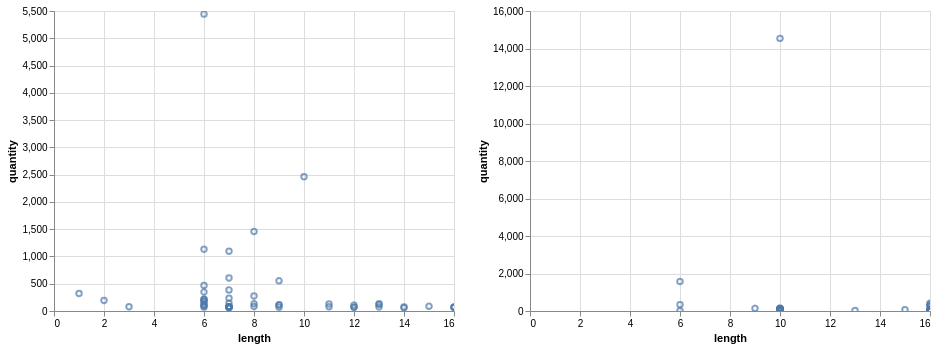

In [10]:
ci = alt.Chart(i).mark_point().encode(
x = 'length',
y = 'quantity').interactive()

cf = alt.Chart(f).mark_point().encode(
x = 'length',
y = 'quantity').interactive()

ci | cf

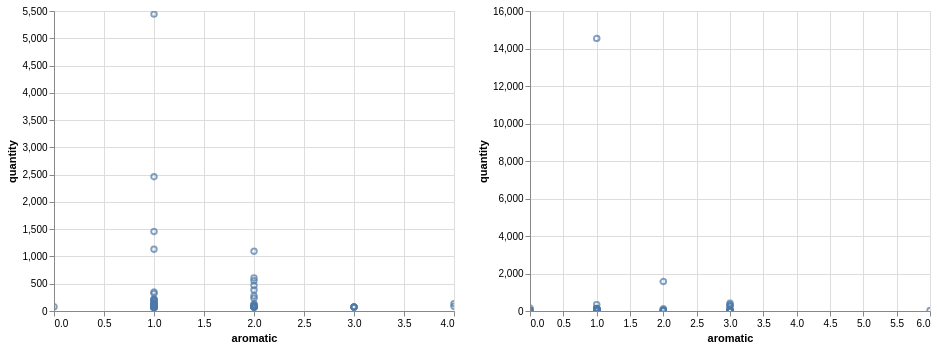

In [11]:
ci = alt.Chart(i).mark_point().encode(
x = 'aromatic',
y = 'quantity').interactive()

cf = alt.Chart(f).mark_point().encode(
x = 'aromatic',
y = 'quantity').interactive()

ci | cf

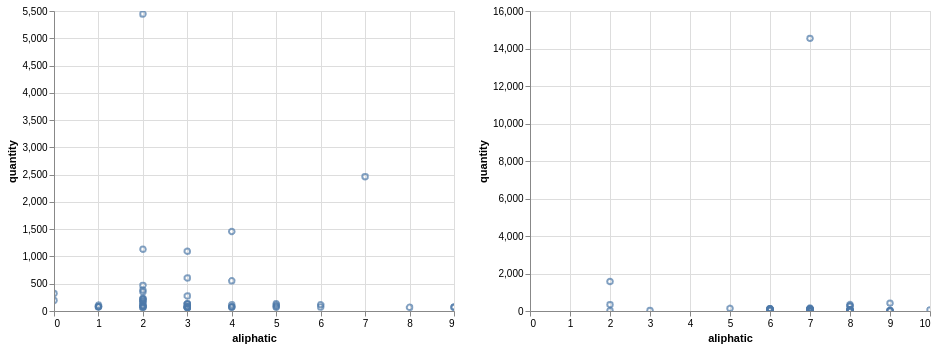

In [12]:
ci = alt.Chart(i).mark_point().encode(
x = 'aliphatic',
y = 'quantity').interactive()

cf = alt.Chart(f).mark_point().encode(
x = 'aliphatic',
y = 'quantity').interactive()

ci | cf

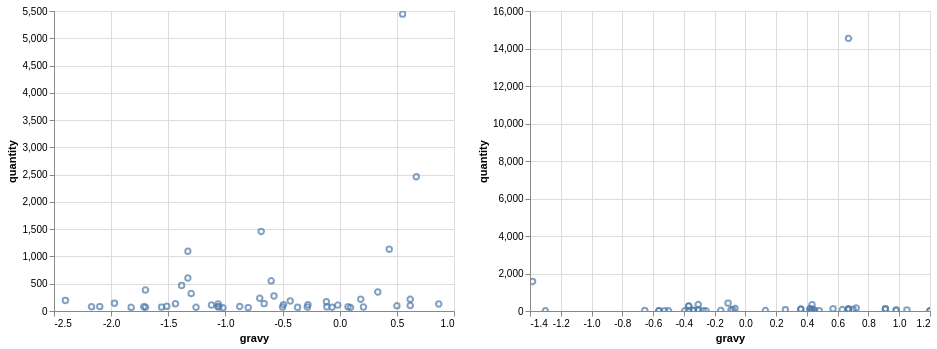

In [13]:
ci = alt.Chart(i).mark_point().encode(
x = 'gravy',
y = 'quantity').interactive()

cf = alt.Chart(f).mark_point().encode(
x = 'gravy',
y = 'quantity').interactive()

ci | cf

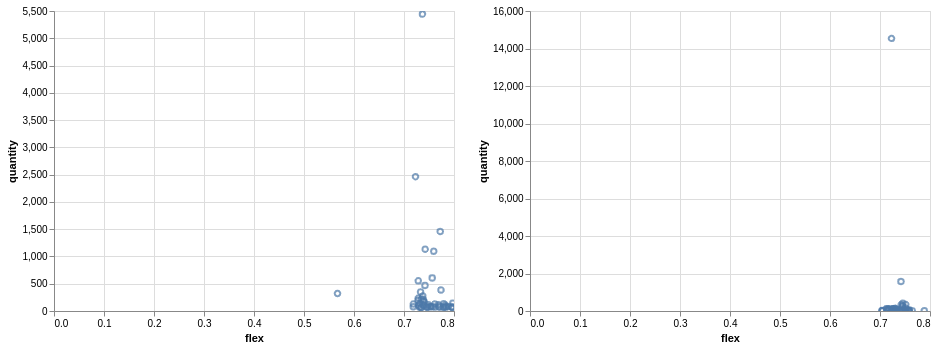

In [14]:
ci = alt.Chart(i).mark_point().encode(
x = 'flex',
y = 'quantity').interactive()

cf = alt.Chart(f).mark_point().encode(
x = 'flex',
y = 'quantity').interactive()

ci | cf

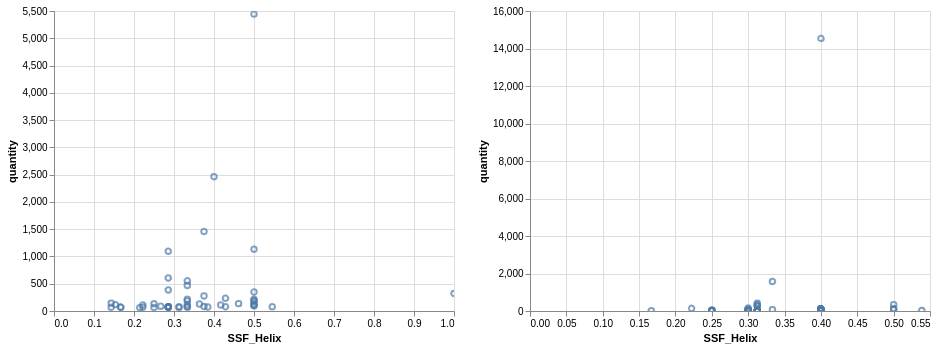

In [19]:
ci = alt.Chart(i).mark_point().encode(
x = 'SSF_Helix',
y = 'quantity').interactive()

cf = alt.Chart(f).mark_point().encode(
x = 'SSF_Helix',
y = 'quantity').interactive()

ci | cf

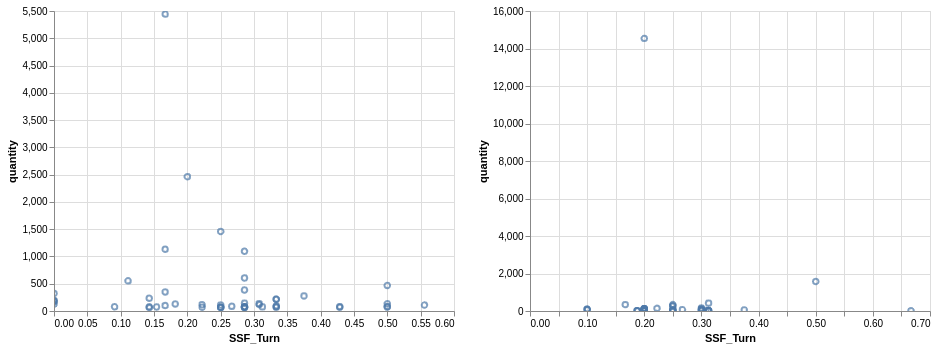

In [20]:
ci = alt.Chart(i).mark_point().encode(
x = 'SSF_Turn',
y = 'quantity').interactive()

cf = alt.Chart(f).mark_point().encode(
x = 'SSF_Turn',
y = 'quantity').interactive()

ci | cf

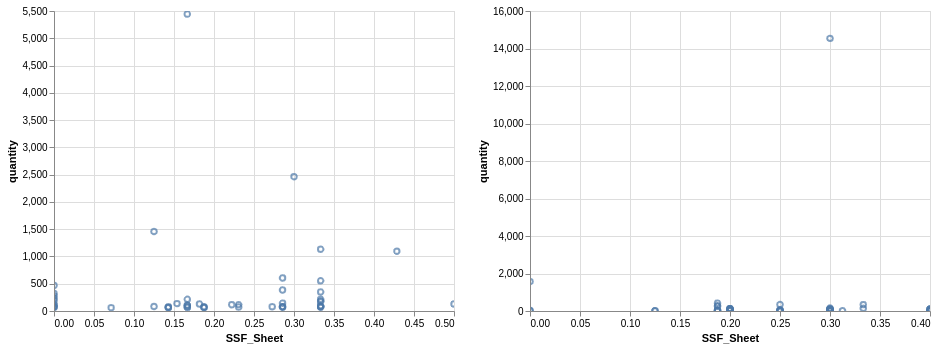

In [21]:
ci = alt.Chart(i).mark_point().encode(
x = 'SSF_Sheet',
y = 'quantity').interactive()

cf = alt.Chart(f).mark_point().encode(
x = 'SSF_Sheet',
y = 'quantity').interactive()

ci | cf

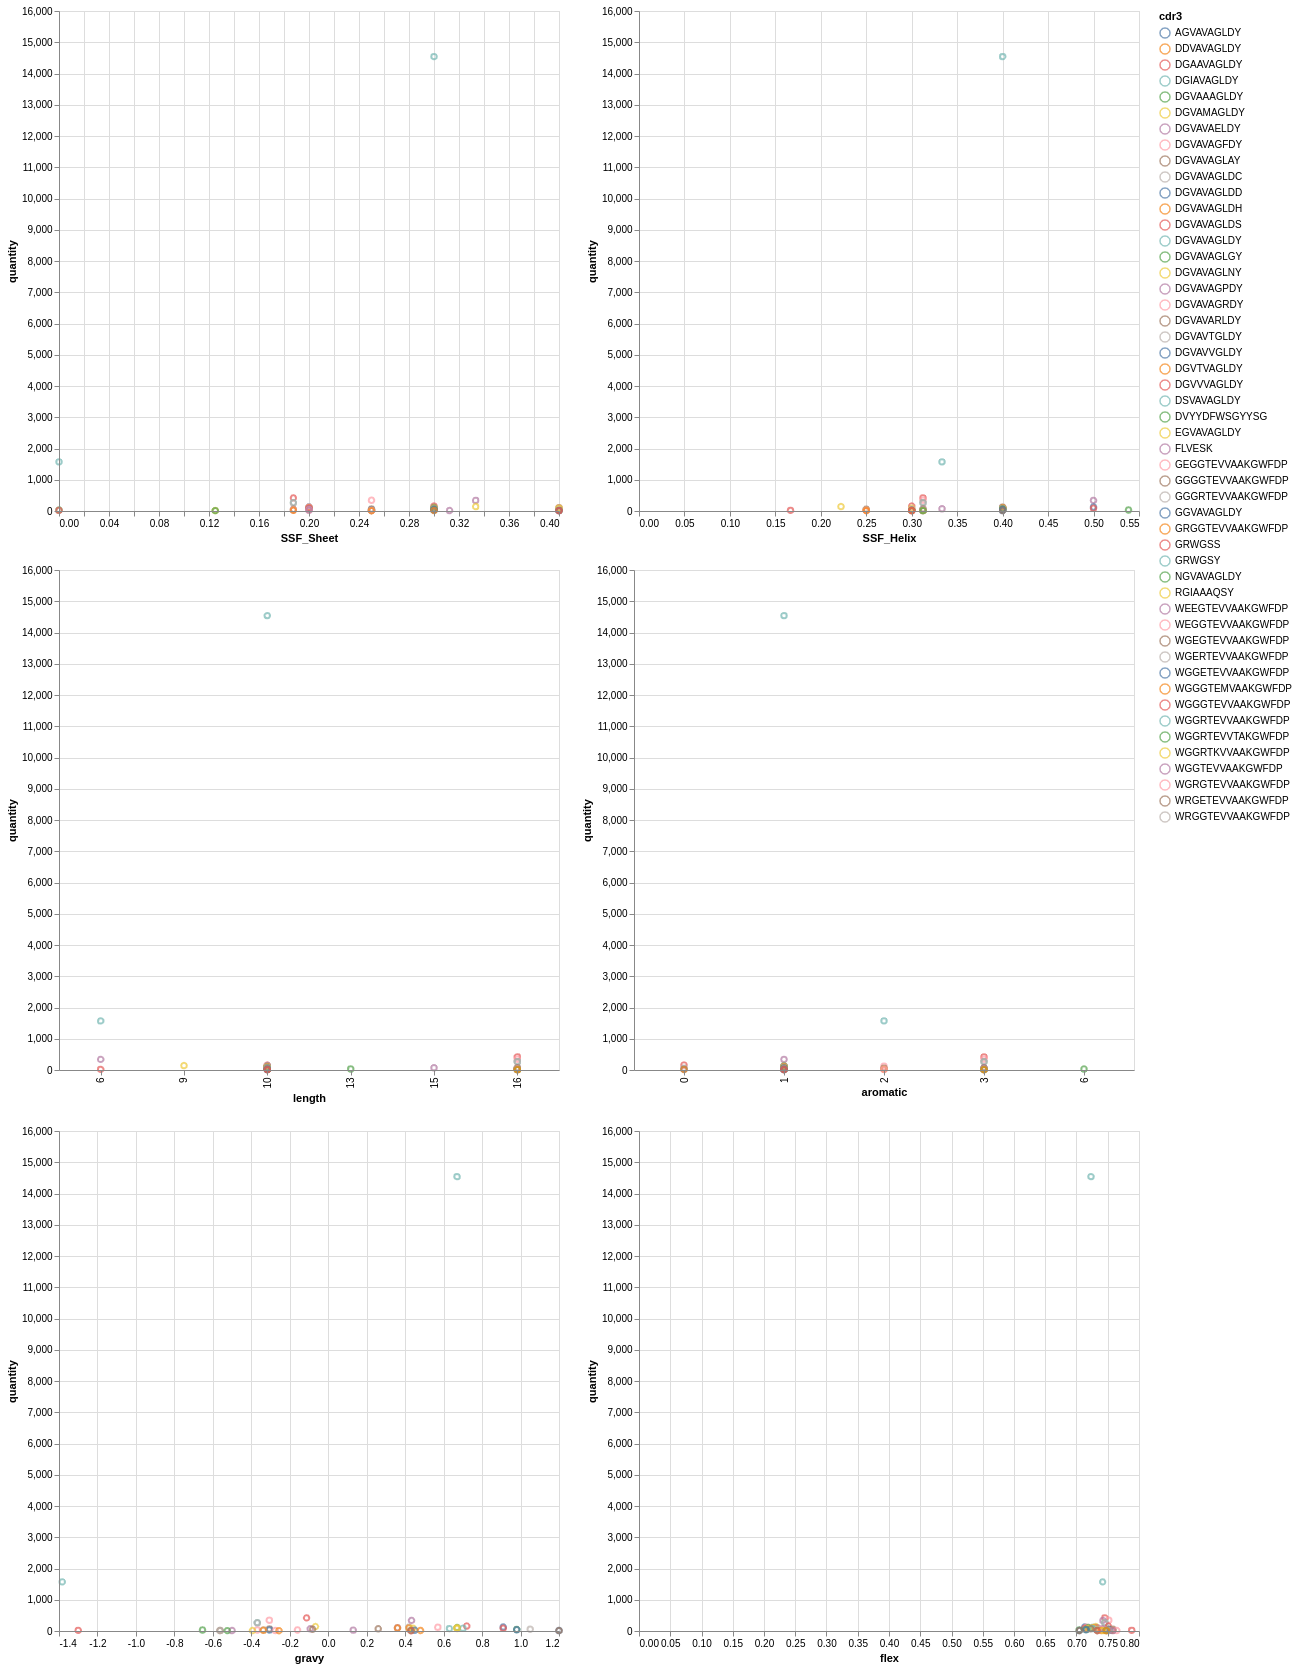

In [45]:
brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(f).mark_point().encode(
    y='quantity:Q',
    color=alt.condition(brush, 'cdr3:N', alt.ColorValue('gray')),
).add_selection(
    brush
).properties(
    width=500,
    height=500
)

# base = alt.Chart(i).mark_point().encode(
#     y='quantity:Q'
# #     color=alt.condition(brush, 'cdr3:N', alt.ColorValue('gray')),
# ).properties(
#     width=600,
#     height=600
# )


(base.encode(x='SSF_Sheet:Q') | base.encode(x='SSF_Helix:Q')) & ( base.encode(x='length:O') | base.encode(x='aromatic:O') ) & ( base.encode(x='gravy:Q') | base.encode(x='flex:Q') )

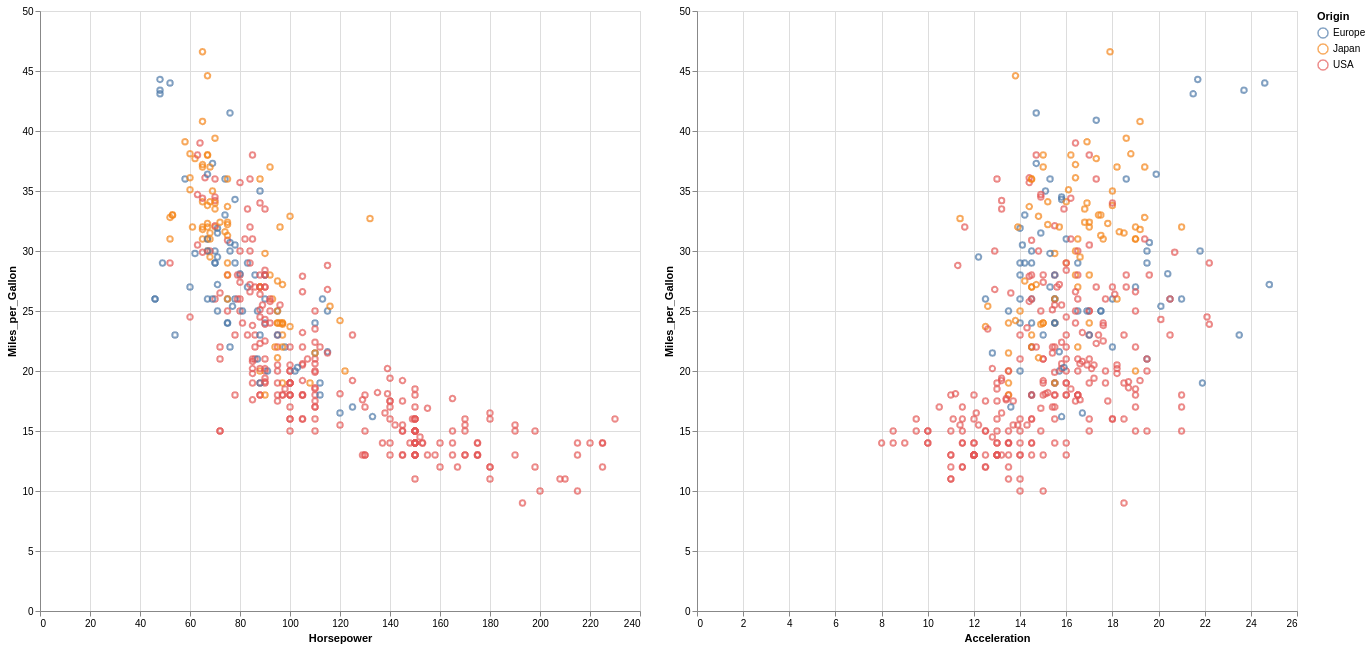

In [35]:
import altair as alt
from vega_datasets import data

source = data.cars()

brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(source).mark_point().encode(
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.ColorValue('gray')),
).add_selection(
    brush
).properties(
    width=600,
    height=600
)

base.encode(x='Horsepower') | base.encode(x='Acceleration')